Encontrar un clasificador por K-NN y evaluar exactitud,
precisión, f-measure. Tomar inicialmente un dataset de
entrenamiento de N=100 (50+50), k=10, y validar con el resto
del dataset. Hacer algunos experimentos con otros N y k, y
también cambiando centroide y covariancia de las clases.

In [2]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

## Dataset: Dos clases aleatorias bidimensionales 

** Una con media en [2, 1] y covarianza [[1, 0.7],[0.7, 1]], la otra con media [1, 3] y covarianza [[1, 0.2],[0.2, 1]]**

In [65]:
#from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal

np.random.seed(32)
size1 = 100
mu1 = [2, 1]
cov1 = [[1, 0.7],[0.7, 1]]

size2 = 100
mu2 = [1, 3]
cov2 = [[1, 0.2],[0.2, 1]]
# Sample classes
xc1 = multivariate_normal(mean=mu1, cov=cov1, size=size1)
xc2 = multivariate_normal(mean=mu2, cov=cov2, size=size2)
X = np.vstack([xc1, xc2])

tc1 = np.ones(xc1.shape[0])
tc2 = np.zeros(xc2.shape[0])
y = np.concatenate([tc1, tc2])

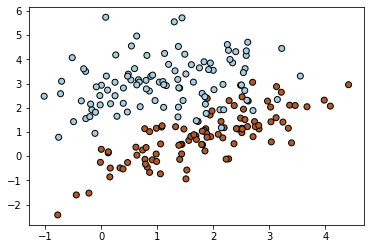

In [66]:
# Veamos cómo se ven
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

**Se observa una división entre las clases, pero algunos puntos están mezclados. Me parece un buen dataset para la prueba del clasificador KNN.**

## Split 50% del Dataset

**Para esta primera prueba separo el 50% del dataset para entrenar y el resto para testear el clasificador**

In [42]:
tam_test = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)

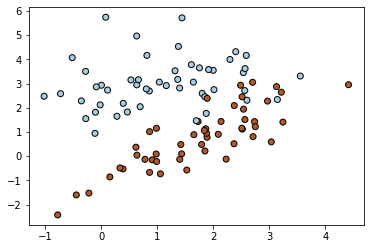

In [25]:
# Veamos cómo se ven
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

### Clasificador KNN con 10 vecinos

In [30]:

#Junto las clases para el entrenamiento. Por ahora sin separar train y test. Para ver los parametros del 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

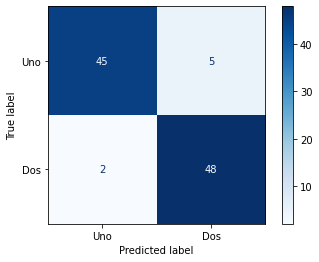

Metricas obtenidas: 
Exactitud = 0.93
Precision = 0.90
f-measure = 0.93


In [31]:
class_names = ["Uno", "Dos"]
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

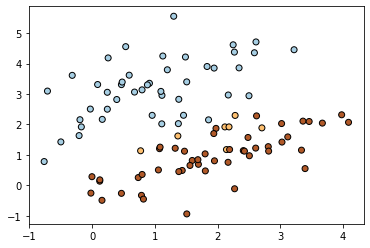

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


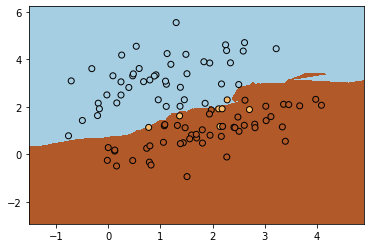

In [32]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred+y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.show()


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test+y_pred, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

** Se observa que el clasificador KNN con el 50% del dataset y 10 vecinos obtine buenos parametros de exactitud, precision y f-measure. En la matriz de confusión se puede observar que el clasificador tiene un pequeño sesgo hacia la clase "Dos" (marrón), ya que predice 47 Clase "Uno" y 53 clase "Dos", siedo ambas clases 50 y 50. Eso también se puede ver reflejado en los gráficos donde la mayor parte de errores de detección se encuentra en el sector marrón del gráfico**

### Clasificador KNN con 15 vecinos

In [33]:
#Mismo dataset, distintos valores de K
knn_2 = KNeighborsClassifier(n_neighbors=15)
knn_2.fit(X_train, y_train)

y_pred_2 = knn_2.predict(X_test)

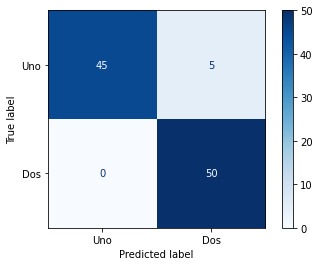

Metricas obtenidas: 
Exactitud = 0.95
Precision = 0.90
f-measure = 0.95


In [34]:
class_names = ["Uno", "Dos"]
disp = plot_confusion_matrix(knn_2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred_2)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_2)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


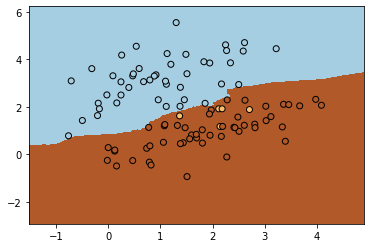

In [35]:
Z = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test + y_pred_2, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

**Con 15 vecinos más cercanos se obtiene una pequeña mejora frente a 10 vecinos más cercanos. El sesgo de clasificar mayor cantidad de puntos como clase "Dos" se mantiene**

### Clasificador KNN con 3 vecinos más cercanos

In [43]:
# con pocos vecinos...
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

y_pred_3 = knn_3.predict(X_test)

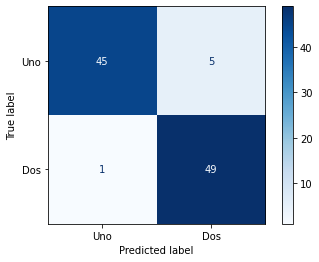

Metricas obtenidas: 
Exactitud = 0.94
Precision = 0.90
f-measure = 0.94


/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


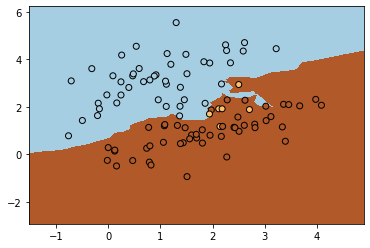

In [44]:
disp = plot_confusion_matrix(knn_3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred_3)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_3)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

Z = knn_3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test + y_pred_3, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

** Con 3 vecinos las metricas dan mejor que con 10 vecinos, sin embargo gráficamente se puede observar el sesgo que se produce por la poca cantidad de puntos utilizados para la clasificación**

## Split con el 80% para test

In [57]:
#Ahora cambio el N

tam_test = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)


knn_4 = KNeighborsClassifier(n_neighbors=15)
knn_4.fit(X_train, y_train)

y_pred_4 = knn_4.predict(X_test)

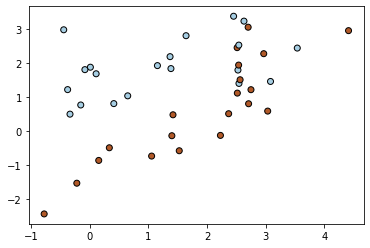

In [58]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

**Se observa que los puntos elegidos aleatoriamente no representan claramente la frontera de desicion y quedan puntos que no son determinantes de las clases para el Clasificador KNN. Se espera peores resultados que los obtenidos con el 50% del dataset para test**

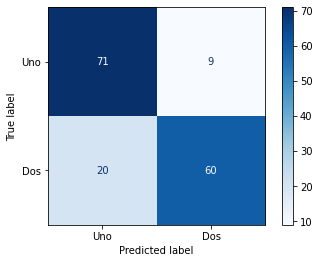

Metricas obtenidas: 
Exactitud = 0.82
Precision = 0.89
f-measure = 0.83


/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


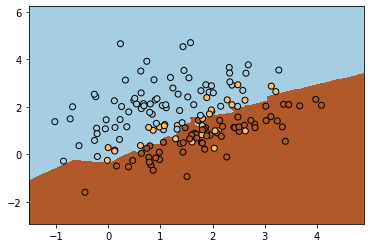

In [59]:
disp = plot_confusion_matrix(knn_4, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred_4)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_4)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

Z = knn_4.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test + y_pred_4, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

**Se obtiene el resultado esperado por lo mensionado anteriormente**

# Dataset: Junto las clases cambiando la media de la clase "Dos" y la covarianza

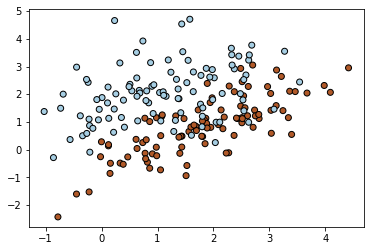

In [60]:
#Junto las clases, aumento un poco la viarianza y las acerco
np.random.seed(32)
size1 = 100
mu1 = [2, 1]
cov1 = [[1, 0.7],[0.7, 1]]

size2 = 100
mu2 = [1, 2]
cov2 = [[1, 0.3],[0.3, 1]]

# Sample classes
xc1 = multivariate_normal(mean=mu1, cov=cov1, size=size1)
xc2 = multivariate_normal(mean=mu2, cov=cov2, size=size2)
X = np.vstack([xc1, xc2])

tc1 = np.ones(xc1.shape[0])
tc2 = -np.ones(xc2.shape[0])
y = np.concatenate([tc1, tc2])

tam_test = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)

# Veamos cómo se ven
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

In [62]:
knn_5 = KNeighborsClassifier(n_neighbors=15)
knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)

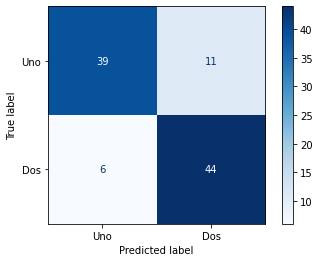

Metricas obtenidas: 
Exactitud = 0.83
Precision = 0.78
f-measure = 0.82


/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


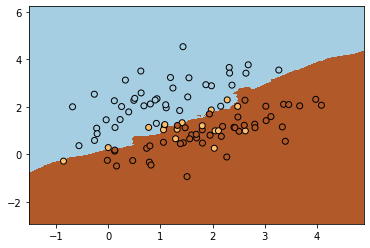

In [63]:
disp = plot_confusion_matrix(knn_5, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred_5)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_5)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

Z = knn_5.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test + y_pred_5, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

**Al encontrarse más "juntas" las clases las métricas que se obtienen son peores que las obtenidas anteriormente**